In [1]:
import itertools
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir('../datasets/input'))

['generated-test.csv', 'generated-train.csv', 'ni.csv']


In [4]:
train = pd.read_csv('../datasets/input/generated-train.csv')
test = pd.read_csv('../datasets/input/generated-test.csv')

X_train = train.drop(['class'], axis=1)
y_train = train['class'].values
X_test = test.drop(['class'], axis=1)
y_test = test['class'].values

X_min_train = train.drop(['m1', 'm2', 'm3', 'm4', 'm5', 'fermi', 'band', 'class'], axis=1)
y_min_train = train['class'].values
X_min_test = test.drop(['m1', 'm2', 'm3', 'm4', 'm5', 'fermi', 'band', 'class'], axis=1)
y_min_test = test['class'].values

print(X_min_train.shape, X_min_test.shape)
print(X_min_train.shape, X_min_test.shape)

(128, 32) (64, 32)
(128, 32) (64, 32)


In [5]:
X_train.head(n=30)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z10,m1,m2,m3,m4,m5,mtot,fermi,band,toten
0,0.473358,0.752142,0.342534,0.442112,0.023763,1.332450,0.852183,0.897287,1.773133,0.307624,...,0.186058,0.264740,0.049777,0.889070,0.764316,0.915761,2.883664,0.729174,-121.928776,-16.888351
1,1.406929,0.885621,1.618850,1.278813,1.370375,1.953892,1.927914,1.259690,1.407703,1.213921,...,1.573961,0.681151,0.069103,0.131427,0.482115,0.797764,2.161560,-0.205104,-113.914517,-37.129386
2,1.149756,0.469775,1.914477,1.955904,0.712416,0.259113,1.262536,1.109115,1.311221,1.172661,...,1.401625,0.244820,0.762678,0.982470,0.944506,0.482344,3.416819,-0.490594,-98.498368,-43.284086
3,0.043570,0.004582,1.818214,1.544106,1.341282,0.639157,0.043053,1.991449,1.232143,0.100358,...,0.500717,0.709042,0.699129,0.472057,0.738514,0.986032,3.604775,0.597539,-66.521115,-9.085831
4,0.326836,1.654056,1.984403,0.666219,1.169822,1.119342,1.954874,1.852413,0.776932,1.829730,...,0.344867,0.794487,0.613954,0.480657,0.419571,0.146063,2.454732,0.471022,-148.698068,-18.484548
5,0.292979,1.677116,1.754864,0.600060,0.145222,1.393272,0.706802,1.488813,1.178758,1.677905,...,0.813242,0.274435,0.874548,0.400632,0.794516,0.576375,2.920505,0.939896,-110.059814,-24.642734
6,0.297450,0.266808,0.906155,0.852577,0.985254,0.360726,0.035767,0.822399,0.189141,1.518831,...,0.038454,0.317563,0.423709,0.267884,0.229992,0.227777,1.466924,-0.198350,-67.004176,-43.936028
7,1.516896,1.058022,0.145731,1.855661,0.475963,0.698602,0.516619,0.738475,0.688010,0.685101,...,1.334236,0.590373,0.191651,0.911460,0.729928,0.178439,2.601851,0.182324,-116.138694,-32.253816
8,0.999726,0.714674,0.632005,1.750329,0.015898,1.272795,0.634158,1.256623,1.596198,1.410074,...,1.426810,0.104040,0.398818,0.887452,0.030305,0.063373,1.483988,0.498315,-105.579094,-14.176070
9,0.940928,1.499383,0.115627,1.894135,1.056129,1.964532,0.512289,1.743412,1.644846,0.320922,...,0.307945,0.764950,0.907974,0.645565,0.662152,0.866607,3.847248,0.439917,-118.933809,-8.177692


In [6]:
X_min_train.head(n=30)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,y8,z8,x9,y9,z9,x10,y10,z10,mtot,toten
0,0.473358,0.752142,0.342534,0.442112,0.023763,1.332450,0.852183,0.897287,1.773133,0.307624,...,0.004180,0.191931,0.916442,1.552207,0.321985,1.987415,1.954057,0.186058,2.883664,-16.888351
1,1.406929,0.885621,1.618850,1.278813,1.370375,1.953892,1.927914,1.259690,1.407703,1.213921,...,0.395615,0.909424,0.087892,0.387251,0.210161,1.412267,0.365365,1.573961,2.161560,-37.129386
2,1.149756,0.469775,1.914477,1.955904,0.712416,0.259113,1.262536,1.109115,1.311221,1.172661,...,0.258702,1.554581,1.923957,1.371332,0.382605,1.410720,1.200023,1.401625,3.416819,-43.284086
3,0.043570,0.004582,1.818214,1.544106,1.341282,0.639157,0.043053,1.991449,1.232143,0.100358,...,0.401590,1.862303,1.122668,1.419000,0.940390,1.269663,0.587528,0.500717,3.604775,-9.085831
4,0.326836,1.654056,1.984403,0.666219,1.169822,1.119342,1.954874,1.852413,0.776932,1.829730,...,1.542495,1.041309,0.998815,1.738212,1.180765,1.560909,0.996984,0.344867,2.454732,-18.484548
5,0.292979,1.677116,1.754864,0.600060,0.145222,1.393272,0.706802,1.488813,1.178758,1.677905,...,1.854725,1.250744,0.299148,1.327153,1.960532,1.465767,0.249974,0.813242,2.920505,-24.642734
6,0.297450,0.266808,0.906155,0.852577,0.985254,0.360726,0.035767,0.822399,0.189141,1.518831,...,1.635221,0.099943,1.829252,1.958997,1.015864,1.611964,0.913600,0.038454,1.466924,-43.936028
7,1.516896,1.058022,0.145731,1.855661,0.475963,0.698602,0.516619,0.738475,0.688010,0.685101,...,1.844003,0.473002,0.474463,0.322840,1.167181,1.785313,1.528223,1.334236,2.601851,-32.253816
8,0.999726,0.714674,0.632005,1.750329,0.015898,1.272795,0.634158,1.256623,1.596198,1.410074,...,1.288020,1.073060,0.955725,0.947006,0.408137,0.814792,0.689212,1.426810,1.483988,-14.176070
9,0.940928,1.499383,0.115627,1.894135,1.056129,1.964532,0.512289,1.743412,1.644846,0.320922,...,0.957640,1.526165,1.971290,1.060945,1.242429,1.004752,1.631726,0.307945,3.847248,-8.177692


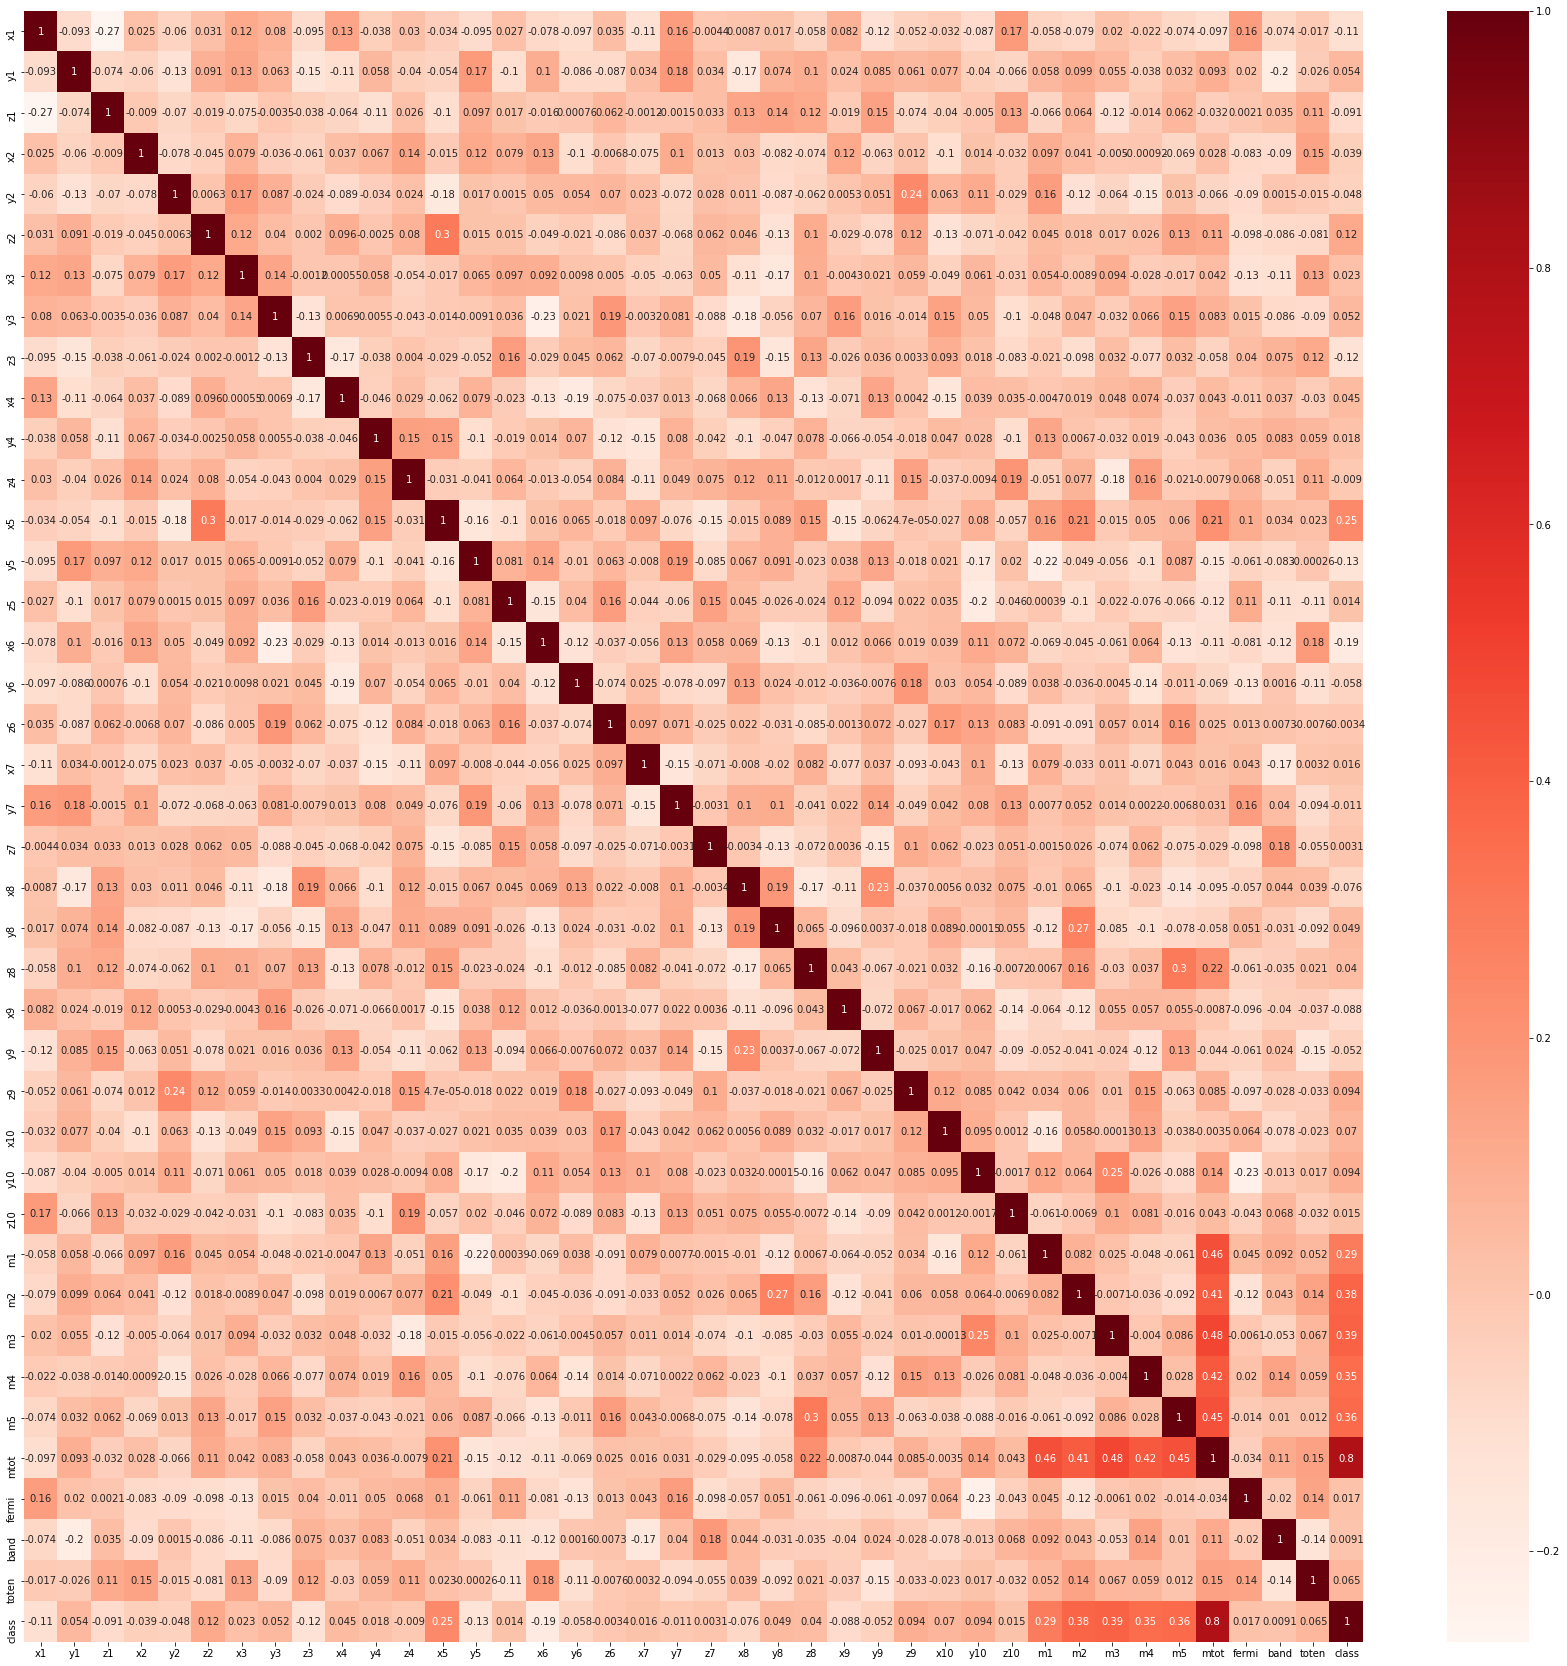

In [87]:
plt.figure(figsize=(30, 30))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [88]:
grid_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [108]:
clf = GridSearchCV(SVC(), grid_params, cv=cv)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [90]:
y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test))

0.9375


In [91]:
clf_min = GridSearchCV(SVC(), grid_params, cv=cv)
clf_min.fit(X_min_train, y_min_train)

print(clf_min.best_params_)

{'C': 1, 'kernel': 'linear'}


In [92]:
y_min_pred = clf_min.predict(X_min_test)

print(metrics.accuracy_score(y_min_pred, y_min_test))

0.90625


In [102]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [103]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27  2]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        35

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64



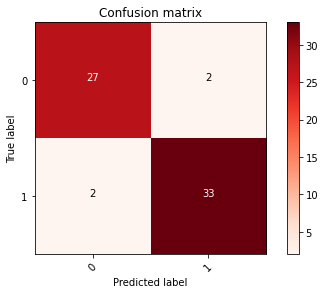

In [104]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1])

In [105]:
print(confusion_matrix(y_min_test, y_min_pred))
print(classification_report(y_min_test, y_min_pred))

[[26  3]
 [ 3 32]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        35

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64



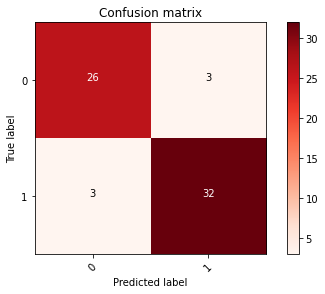

In [106]:
cm_min = confusion_matrix(y_min_test, y_min_pred)
plot_confusion_matrix(cm_min, [0, 1])

0.9369458128078818
0.9054187192118226


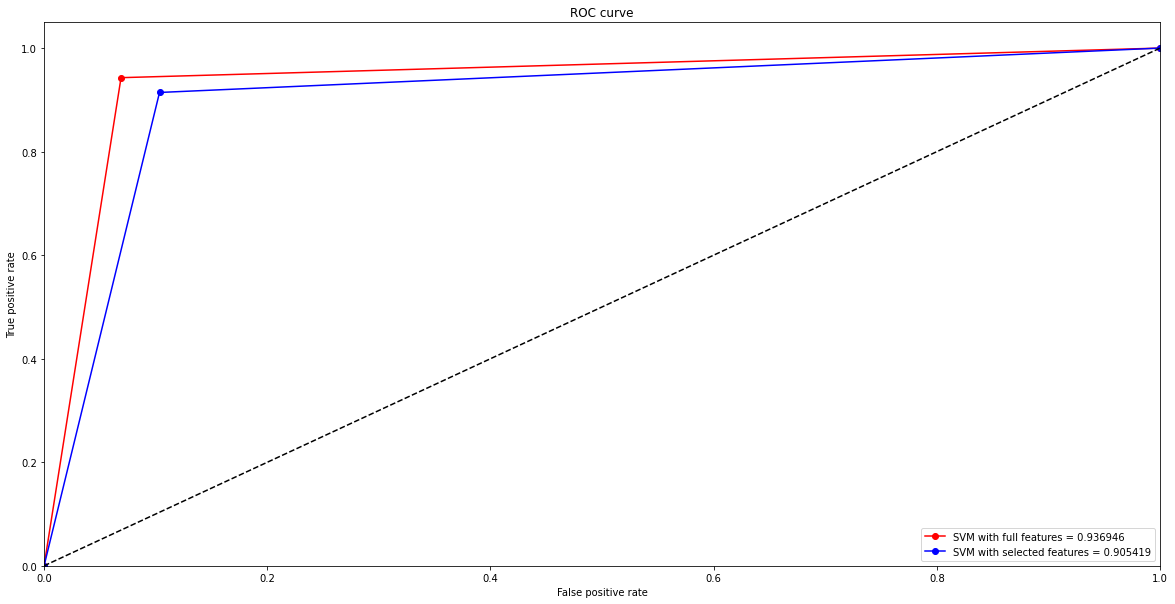

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(roc_auc)

fpr_min, tpr_min, _ = roc_curve(y_min_test, y_min_pred)
roc_auc_min = auc(fpr_min, tpr_min)

print(roc_auc_min)

plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, 'ro-', label='SVM with full features = %f' %roc_auc)
plt.plot(fpr_min, tpr_min, 'bo-', label='SVM with selected features = %f' %roc_auc_min)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [114]:
train_sizes, train_scores, test_scores = \
    learning_curve(clf.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [122]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):
    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="lower right")
    return plt

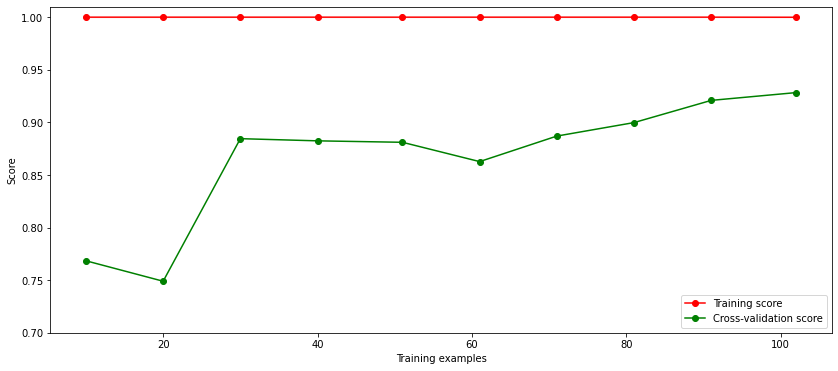

In [123]:
plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()